### Pros:
   - Fast to train
   - Intuitive
   - can pick up on arbitrary patterns (unline logit or dtrees)
   - one assumption: closer points are more similar

### Cons:

   - k is unknown
   - Model parameter is the entire training dataset
   - Prediction can be expensive (lazy)
   - Because distance is used, scaling can be important
   - No feature weights

### Parameters:
   - entire training set
   - values "learned" from the training data
   - the information we need to make predictions

### Hyperparams
    
   - k: n_neighbors: closest k datapoints to consider
   - weights
       - uniform: each k closest point's vote has equal weight
       - distance: votes are weighted by distance to the new observation
       - distance metric

* n_neighbors is the hyperparameter we'll most commonly interact with.

_________________________

In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import knn_lesson_util as util

from sklearn.neighbors import KNeighborsClassifier

In [3]:
#plotting defaults
plt.rc('axes', grid=True)
plt.rc('figure', figsize=(11, 8.5))
plt.rc('axes.spines', top=False, right=False)

In [4]:
#split into train and test
train, test= util.get_ice_cream_data(True)

In [5]:
#see data size
train.shape, test.shape

((90, 3), (10, 3))

In [6]:
#get first 10 samples
train.head(10)

,flavor,pints,n_sprinkles
1,blueberry,7.675963,9.218088
88,blueberry,7.129386,11.863298
58,pistachio,12.182332,4.433103
30,pistachio,13.955832,8.325024
61,chocolate,10.748216,8.920000
18,pistachio,11.748810,7.910239
81,pistachio,12.643337,14.461707
75,pistachio,13.541231,11.137933
13,blueberry,7.690777,12.123159
37,pistachio,13.819761,10.373848


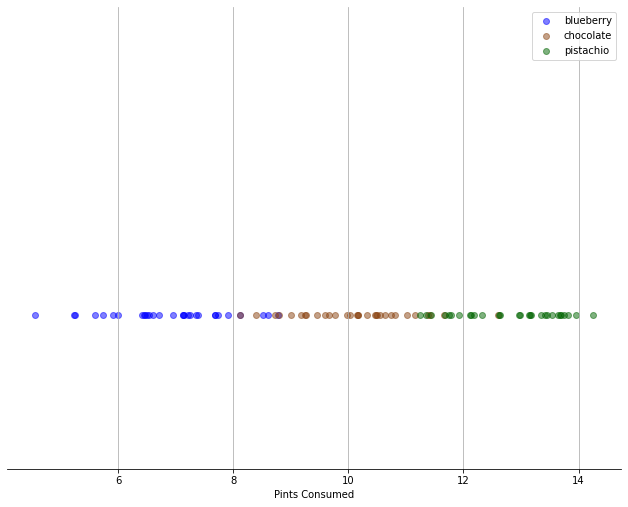

In [7]:
#plot a single numeric variable
util.plot_pints(train, test, plot_test=False)

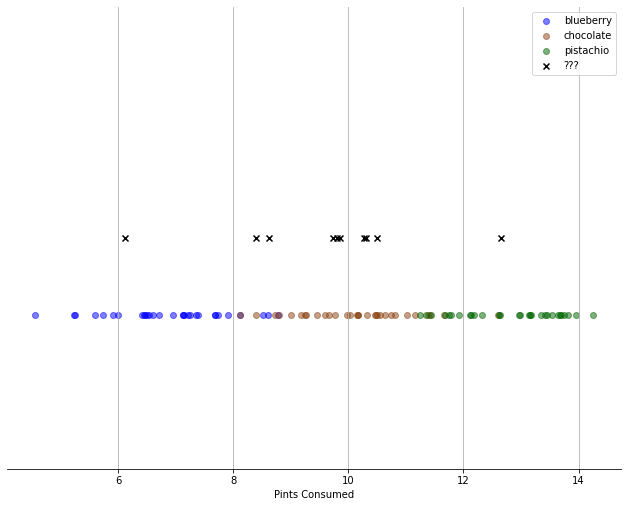

In [8]:
#ONE dimension
#plot with predictions (x)
util.plot_pints(train, test, plot_test=True)

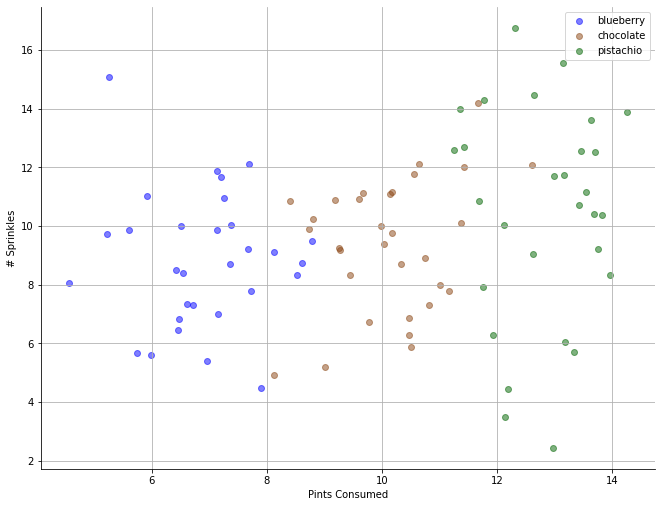

In [9]:
#TWO dimensions
#show number of pints consumed AND number of sprinkles
util.plot_pints_and_sprinkles(train, test, plot_test=False)

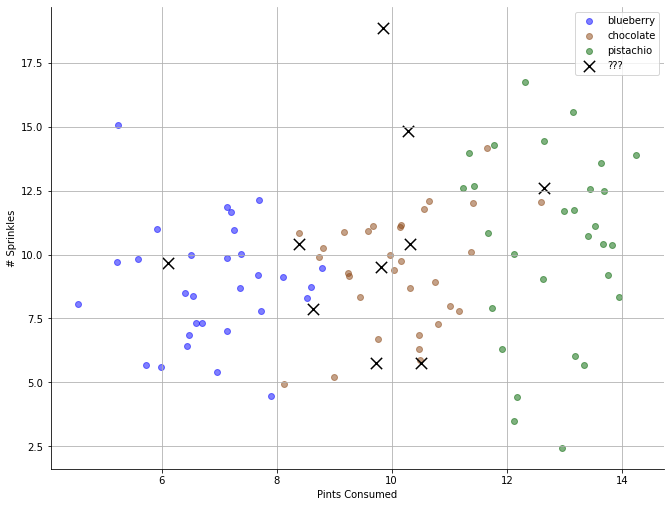

In [10]:
#two dimensions with predicted points
util.plot_pints_and_sprinkles(train, test, plot_test=True)

#### Use Euclidean distance to calculate distance from predicated points to NEAREST point

$\sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$

In [12]:
#X_train to include pints and sprinkles only
X_train = train[['pints', 'n_sprinkles']]

#X_test to include pints and sprinkles only
X_test = test[['pints', 'n_sprinkles']]


y_train = train.flavor
y_test = test.flavor

## Use these 3 lines of code for KNN!

In [13]:
#create the thing
knn = KNeighborsClassifier(n_neighbors=1)

#fit the thing
knn.fit(X_train, y_train)

#score the thing
knn.score(X_train, y_train)

1.0

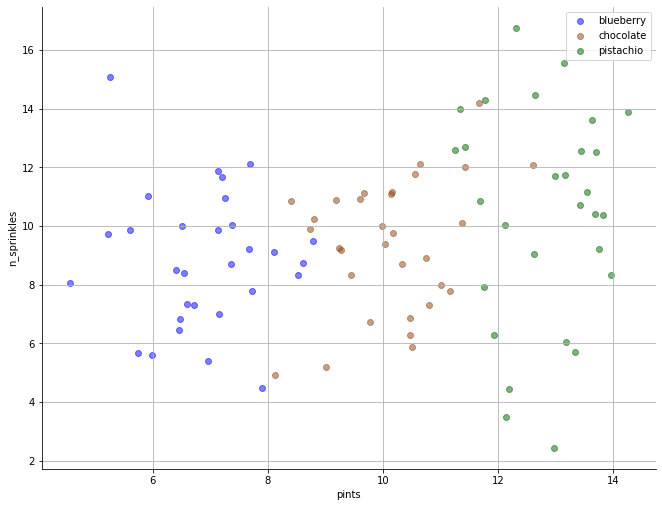

In [14]:
train['prediction'] = knn.predict(X_train)
train['correct'] = train.prediction == train.flavor

util.plot_misses(train)

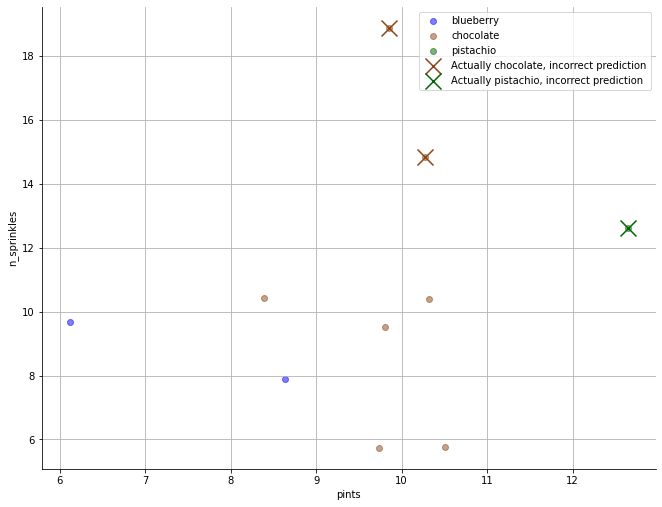

In [15]:
#X is wrong predictions
#dots are correct predictions

#visualize on Test set
test['prediction'] = knn.predict(X_test)
test['correct'] = test.prediction == test.flavor

util.plot_misses(test)

In [ ]:
#how do we know how MANY of the closest values to look at??
## MEASURE
## try out several different
## create a loop to get a range (like below)

In [16]:
#look at all values through 1 and 12

for k in range(1, 13):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    print(f'{k:2d}: {accuracy:.2%}')

 1: 70.00%
 2: 80.00%
 3: 80.00%
 4: 80.00%
 5: 80.00%
 6: 80.00%
 7: 80.00%
 8: 80.00%
 9: 80.00%
10: 70.00%
11: 70.00%
12: 70.00%


In [ ]:
#small number of neighbors- model is underfit
#larger number of neighbors- model becomes overfit

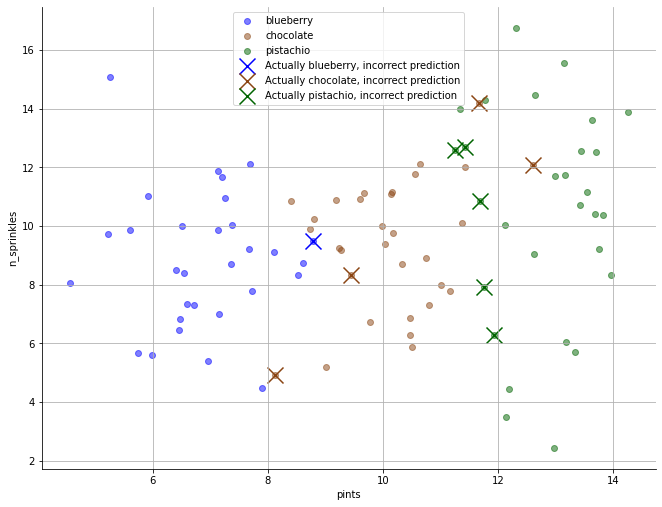

In [17]:
#as shown above- K= 2 through K=9 gives you most accuracy
#K=4 in this model
#train is UNseen data

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

train['prediction'] = knn.predict(X_train)
train['correct'] = train.prediction == train.flavor

util.plot_misses(train)